<a href="https://colab.research.google.com/github/tom-gemini-cloud/regression_experiments/blob/main/linear_regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first thing we need to do is import all of the relevant libraries we need for developing our regression model.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import mpl_toolkits
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

We can then connect our data set that we wish to use - remember you must upload the dataset into the file section on Google Colab - also when typing the name ensure you put the full file name (including .xlsx)

In [15]:
data = pd.read_excel("Regression.xlsx")
print(data)

    Marketing budget  Store sales
0                763       120000
1               1203       280000
2               2580       350000
3               3489       448000
4               3799       510963
5               3955      1541037
6               4986      1786423
7               5096      3863552
8               5163      4450025
9               5496      6856985
10              5934      8750085
11              6196      9869824
12              6523     12582699
13              7563     13582895
14              8632     14588639
15              9632     15582699
16              9963     16587842
17             10523     18588412
18             11063     18999988
19             12358     19998563
20             12963     20874523
21             13665     21582689
22             14589     23585698
23             15698     25589654


As shown above once we have defined 'data' as our dataset we can then simply view the dataset to ensure it is what we were expecting.

To start we will develop a simple correlation heatmap-

<Axes: >

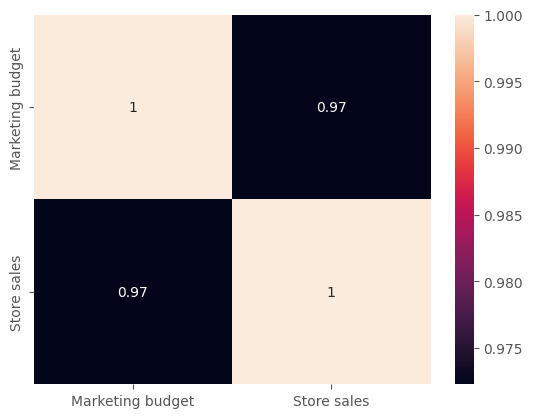

In [16]:
#A correlation heatmap is a graphical tool that displays
# the correlation between multiple variables as a color-coded matrix.
#It’s like a color chart 🌈 that shows us how closely related different variables are.

sns.heatmap(data.corr(), annot = True)


Now to start building our regression model we will start by defining sales and marking as our axis names from the dataset.

In [17]:
sales = data['Store sales']


marketing = data.drop('Store sales', axis ='columns')

Once done we can now define the new names within the linear regression model - as you can see we are using the sklearn library that we previous imported.

In [18]:
lr = linear_model.LinearRegression()
lr.fit(marketing, sales)

LinearRegression()

We can now start by testing model - in this instance when we input a value (150) for Marketing budget in Thousands - the model predicts that the Actual sales in millions will be 11.26

In [19]:
lr.predict([[20000]])

array([35273664.74116541])

In [20]:
linear_line = lr.predict(marketing)

In [21]:
lr.score(marketing, sales)

0.945299052061944

We can now start plotting our data into a scatter plot to visualise both our data points and the linear line.

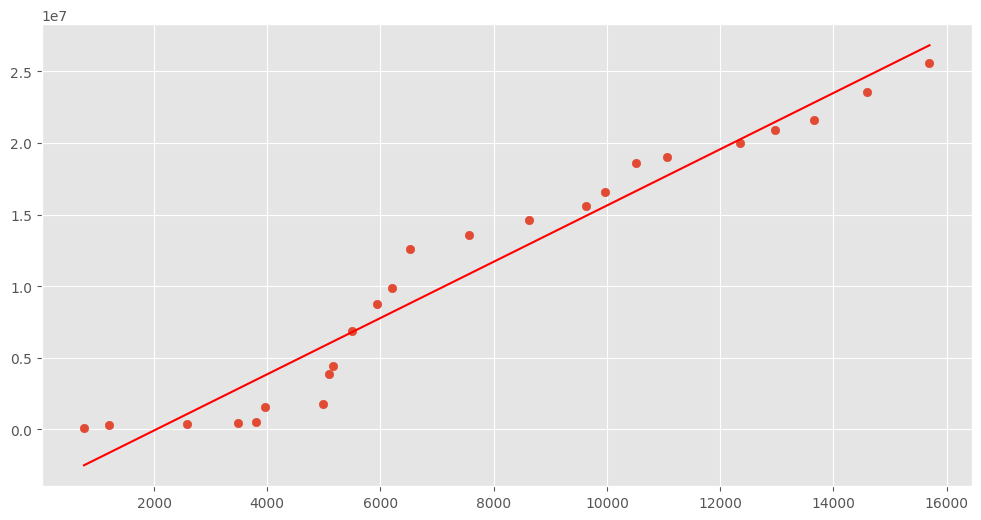

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(data['Marketing budget'], data['Store sales'])
plt.plot(data['Marketing budget'], linear_line, 'r')
plt.show()

We can also develop a visualisation to compare the original dataset in comparison to the predicted outcomes - this will help us to ensure that the predictions are not too far from our known data.

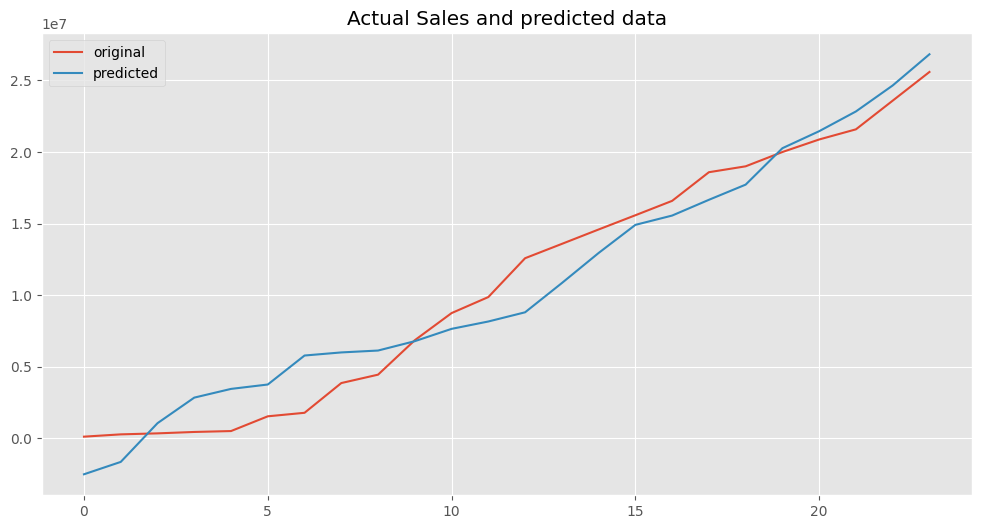

In [23]:
plt.figure(figsize=(12,6))
x_ax = range(len(data['Store sales']))
plt.plot(x_ax, data['Store sales'], label="original")
plt.plot(x_ax,linear_line, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()

In [31]:
data['Actual Sales in Millions'] = data['Store sales'] / 1000000
sales2 = data['Actual Sales in Millions']
marketing2 = data.drop('Actual Sales in Millions', axis ='columns')
lr2 = linear_model.LinearRegression()
lr2.fit(marketing2, sales2)
lr2.predict([[20000]])
linear_line2 = lr2.predict(marketing2)
plt.figure(figsize=(12,6))
x_ax2 = range(len(data['Store sales']))
plt.plot(x_ax2, sales2, label="original")
plt.plot(x_ax2, linear_line2, label="predicted")
plt.title("Actual Sales and predicted data (in Millions)")
plt.legend()
plt.show()

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

Now lets say there is a few predictions we want to make - we can insert new data into our marketing budget

In [25]:
stock = pd.DataFrame({'Marketing Budget (X) in Thousands': [126, 356, 120, 128, 286, 190, 310]})
stock

,Marketing Budget (X) in Thousands
0,126
1,356
2,120
3,128
4,286
5,190
6,310


In [26]:
predicted_sales = lr.predict(stock)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Marketing Budget (X) in Thousands
Feature names seen at fit time, yet now missing:
- Marketing budget
- Store sales


From this we can then run our model to calculated the predicted sales

In [ ]:
predicted_sales

Here displays the outcome from our new data for marketing budget and the forecasted sales using our developed model

In [ ]:
stock['Forecasted Sales'] = predicted_sales
stock